<a href="https://colab.research.google.com/github/aaryarao/UT_DataAnalyticsCert/blob/main/PYF_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis





### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

We have obtained a csv containing information from a food delivery platform in order to create actionable insights to promote their business efficiency. Below is the data dictionary containing further information on the data. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Data/foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### Basic Data Insights

In [4]:
print('There are', df.shape[0], 'rows and', df.shape[1],'columns in this data set.')

There are 1898 rows and 9 columns in this data set.


In [5]:
# Printing a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 

* All columns except rating have the correct data type
* The column for rating (index 6) is printed as Dtype object. Rating should be changed to a float data type.





### Treating missing values

In [6]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [7]:
# converting Not Given values to NaN
df['rating'] = df['rating'].replace(['Not given'], [np.nan])
# changing rating series to Dtype float and printing to confirm
df['rating'] = df['rating'].astype('float')
print(df['rating'])

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating, Length: 1898, dtype: float64


#### Observations: 


* There are no null values in the dataset
* The rating column has several entries as not given, for the sake of performing calculations I have replaced 'Not given' with NaN





### Statistical data summary

In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations: 

* We will exclude the first two rows from analysis, cust and order id provide no meaningful insights in this context
* The cost of orders range from 4 to 35 dollars, with the average cost being $16.50
* The describe() function shows us the minimum(20 minutes), average(27 minutes), and maximum(35 minutes) that it takes for food to be prepared once an order is placed.
* The mean and median values for food prep and delivery time are relatively similar indicating that the data in both columns is not highly skewed




In [9]:
print('There are',df['rating'].isnull().sum(),'orders that are not rated.')

There are 736 orders that are not rated.


#### Observations: 

* This constitutes roughly 40% of the data in the rating series. 
* Calculations performed on this data may not be accurate as there are a high number of missing values- customers may have chosen not to provide a rating for many different reasons.


## Exploratory Data Analysis (EDA)

### Univariate Analysis

* Different graphs will be used according to each variable type
* Order id will not provide any meaningful insight when analyzed so it is being excluded from graphing
* Finding distinct count of cust. id shows repeat orders made by unique customers

### Categorical variables - using a histogram to determine frequency
restaurant_name,
cuisine_type,
day_of_the_week

### Numerical variables - boxplot
cost_of_the_order,
rating,
food_preparation_time,
delivery_time


In [10]:
# number of unique customers
df['customer_id'].nunique()

1200

In [11]:
# number of unique restaurants
df['restaurant_name'].nunique()

178

In [12]:
# count of restaurants in each cuisine
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

<Axes: xlabel='cuisine_type', ylabel='count'>

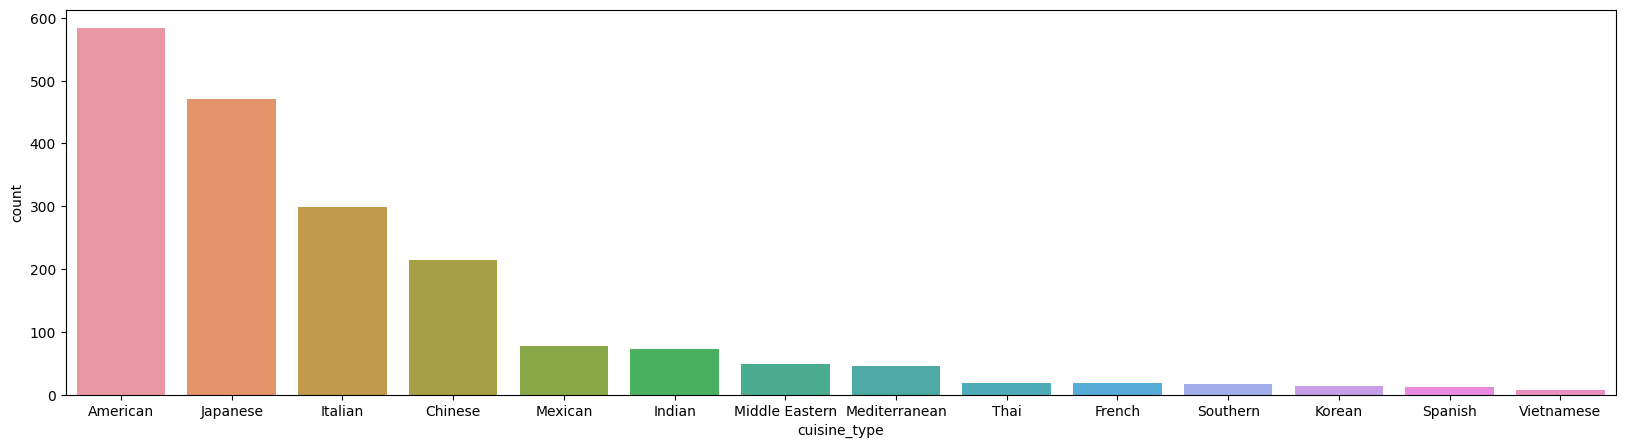

In [13]:
# countplot showing different cuisine types
plt.figure(figsize= (20,5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)

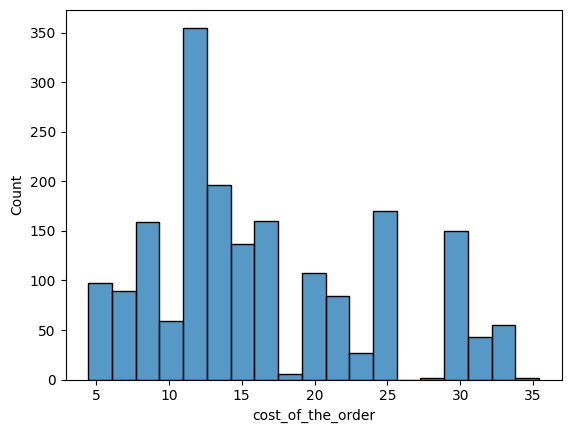

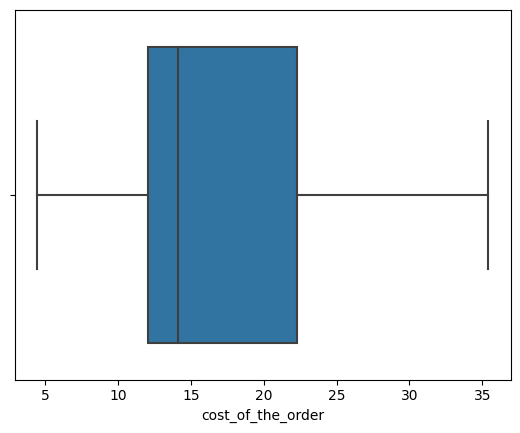

In [14]:
# histogram and box plot with distribution of cost of order
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

<Axes: xlabel='rating', ylabel='count'>

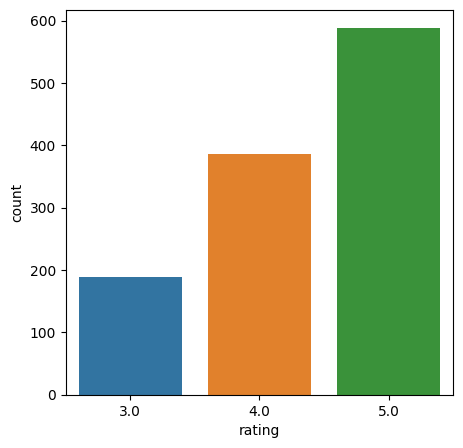

In [15]:
# distribution of ratings
plt.figure(figsize= (5,5))
sns.countplot(data=df, x='rating')

<Axes: xlabel='day_of_the_week', ylabel='count'>

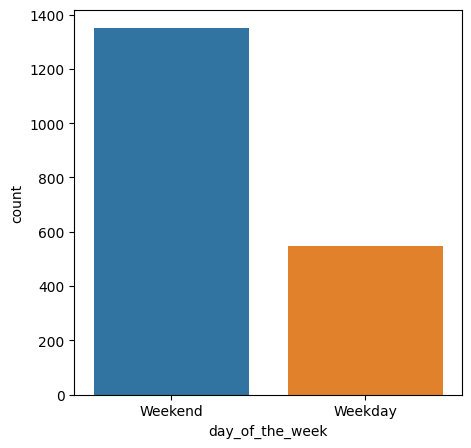

In [16]:
# count of weekend vs. weekday
plt.figure(figsize= (5,5))
sns.countplot(data=df, x='day_of_the_week')

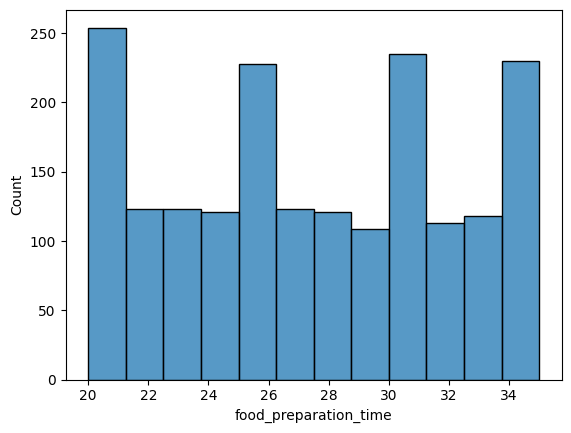

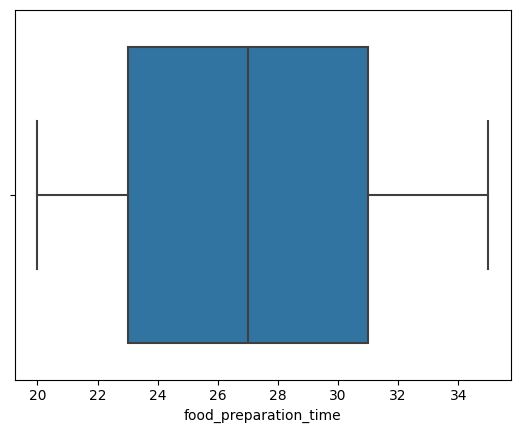

In [17]:
# frequency and distribution of food preparation time
sns.histplot(data=df, x='food_preparation_time')
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

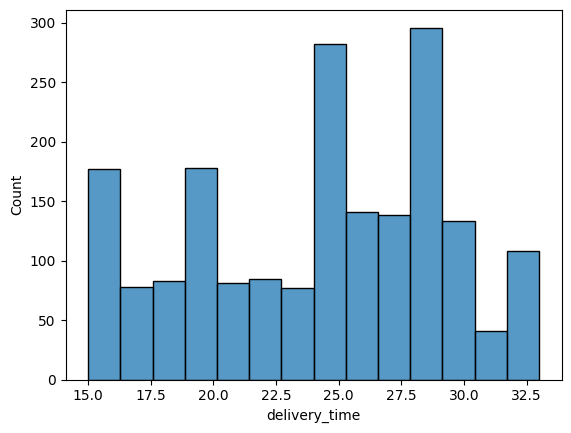

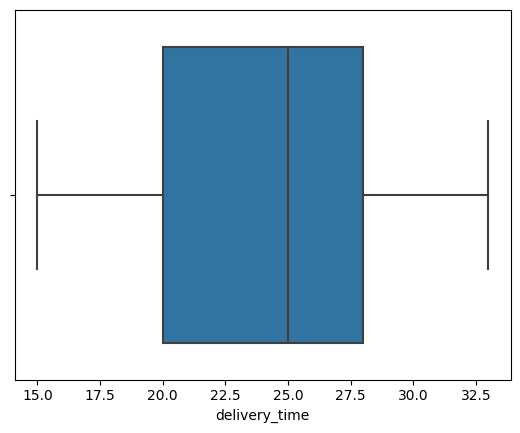

In [18]:
# frequency and distribution of delivery time
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

Observations:

* There are 1200 unique customers- the top customers have placed 13, 10 and 9 orders
* There are 178 unique restaurants within this dataset
* The top cuisine is American food with 584 orders, while Vietnamese food has the least
* The boxplot for cost of order shows that the data is slightly right skewed, the median (~15 dollars) is closer to the minimum than the maximum value
* The ratings show a positive trend, the majority of values are 5 stars- however this may be due to the fact that only customers that feel strongly about their orders would opt to spend their time voting
* There are nearly 1400 orders on the weekend- more than twice as many orders as the weekday
* The histogram and boxplot for food preparation time and delivery time show the data nearly follows a somewhat uniform distribution & no outliers are noted
* Both time related variables spikes in frequency on each interval of 5 minutes: 20, 25, 30 and 35 minutes are recorded more frequently which may be due to rounding while data reporting

### Top 5 restaurants in terms of number orders recieved

In [34]:
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [35]:
# percent of orders made by the top 5 restaurants
round(df['restaurant_name'].value_counts().head(5).sum(0) / df.shape[0] , 4) * 100

33.4

#### Observations:

* Shake Shack is the top restaurant with 219 orders
* The top 5 restaurants make up 33% of the 1898 orders in the dataset


### Most popular cuisine on weekends

In [21]:
#value counts of orders by cuisine for each day of the week
df[df.day_of_the_week == 'Weekend'].cuisine_type.value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

### Orders costing more than 20 dollars

In [22]:
# percentage of orders costing more than 20 dollars
np.round(df[df.cost_of_the_order > 20].shape[0] / df.shape[0], 4) * 100

29.24

#### Observations:

* 29.2% of orders cost more than 20 dollars


###Mean order delivery time

In [36]:
print(f'The mean order delivery time is', round(df['delivery_time'].mean(),2), 'minutes')

The mean order delivery time is 24.16 minutes


### The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [24]:
#creating new df with value count of each cust_id
df2=df['customer_id'].value_counts()
print('There are ' + str(len(df2[df2>1].index.tolist())) + ' customers that have placed multiple orders. Below is the top 5 customer ids by number of orders.') 

#displaying results as a bar graph
df2[df2>1].head(5).to_frame().style.bar()

There are 416 customers that have placed multiple orders. Below is the top 5 customer ids by number of orders.


,customer_id
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:

* Cust_id 52832 has placed 13 orders
* The top 5 customers account for 47 orders


###Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

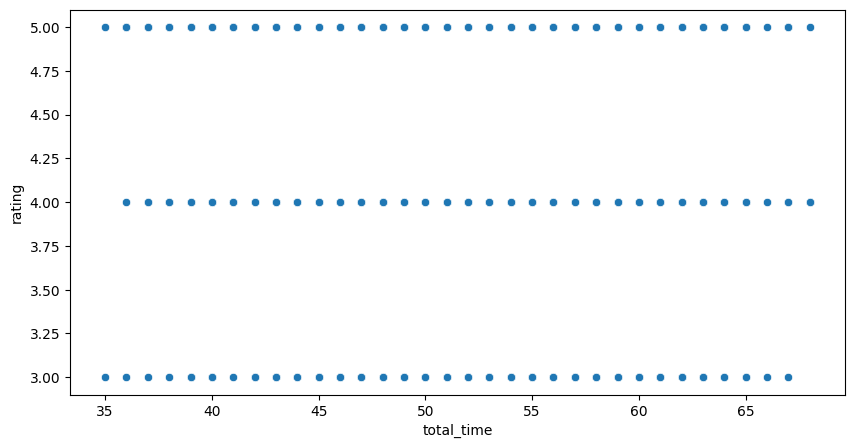

In [25]:
#defining total time
df['total_time'] = df.food_preparation_time + df.delivery_time

#comparing rating and total time
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'total_time', y= 'rating', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

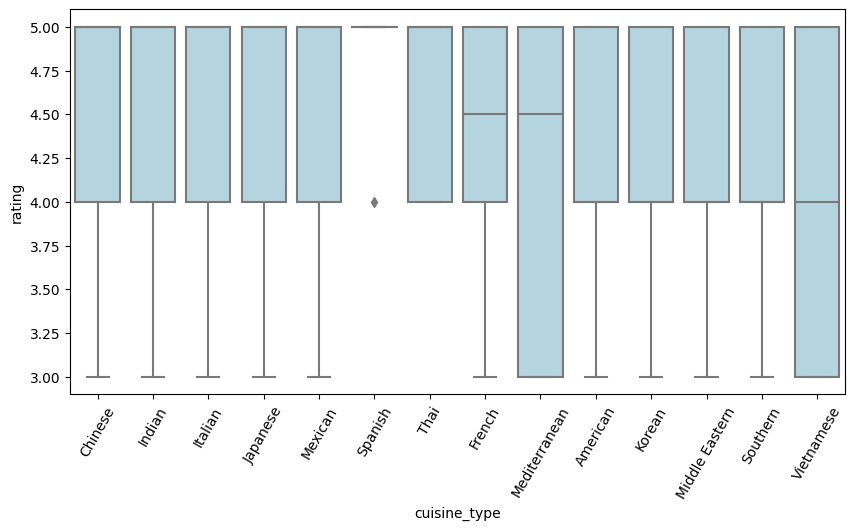

In [26]:
#setting desired grp order
grp_order = df.groupby('cuisine_type').rating.agg('median').sort_values(ascending = False).index 

#comparing cuisine and rating
plt.figure(figsize=(10,5))
sns.boxplot(x= 'cuisine_type', y= 'rating', data=df, color= 'lightblue', order=grp_order )
plt.xticks(rotation = 60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

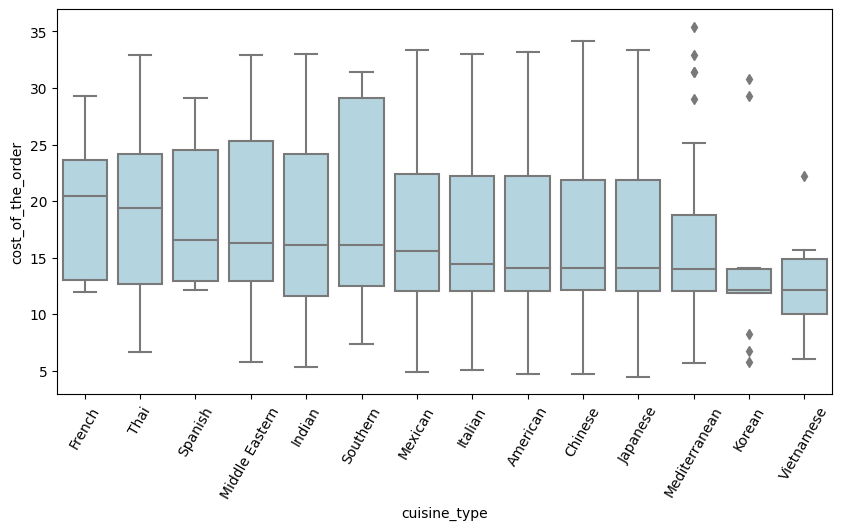

In [27]:
#defining desired group order
grp_order = df.groupby('cuisine_type').cost_of_the_order.agg('median').sort_values(ascending = False).index 

#comparing cuisine type and the cost of order
plt.figure(figsize=(10,5))
sns.boxplot(x= 'cuisine_type', y= 'cost_of_the_order', data=df, color= 'lightblue', order=grp_order)
plt.xticks(rotation = 60)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

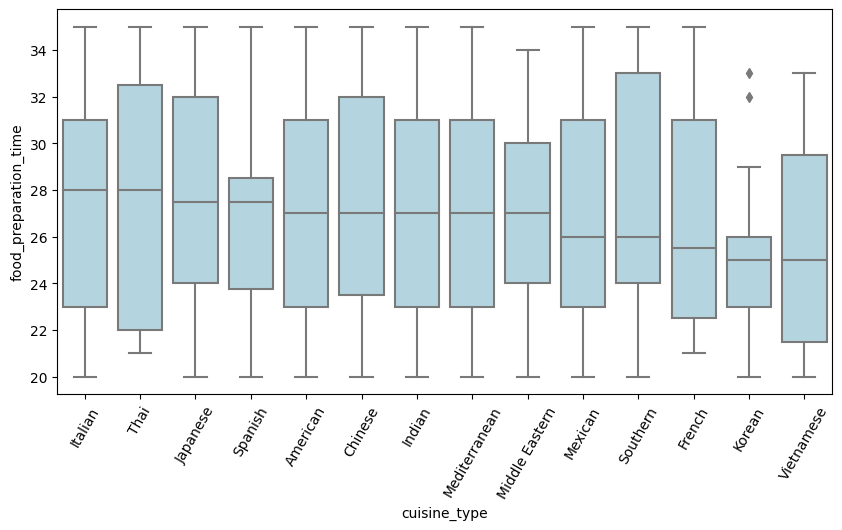

In [28]:
#defining desired group order
grp_order = df.groupby('cuisine_type').food_preparation_time.agg('median').sort_values(ascending = False).index 

#comparing cuisine type and the food preparation time
plt.figure(figsize=(10,5))
sns.boxplot(x= 'cuisine_type', y= 'food_preparation_time', data=df, color= 'lightblue', order=grp_order )
plt.xticks(rotation = 60)
plt.show

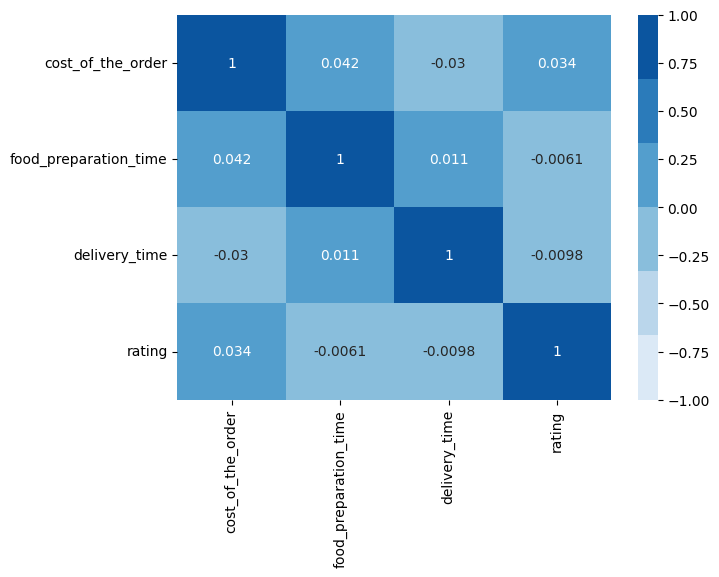

In [29]:
#creating desired color palette for heatmap
blue=sns.color_palette('Blues')

hmap_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(7,5))
sns.heatmap(df[hmap_cols].corr(), annot=True, vmin=-1, vmax=1, cmap= blue)
plt.show()

#### Observations:

* There is no significant difference in rating based upon the total food preparation + delivery time
* Cuisine and rating of orders have no significant relationship based upon this dataset
* French and Thai cuisines have the highest median prices and Mediterranean has the highest individual orders as seen in the outliers
* Korean and Vietnamese cuisines have the lowest median prices
* Italian cuisine has the highest median preparation time and Korean has the lowest
* The variables food delivery time, food preparation time, rating and cost of the order don't have any strong correlations

###The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling this criteria.

In [30]:
#creating new df to merge count of ratings and average ratings
count_of_ratings = df.restaurant_name.value_counts().reset_index()
count_of_ratings.columns = ['restaurant_name','number_ratings']

avg_of_ratings = df.groupby('restaurant_name').rating.mean().reset_index()
avg_of_ratings.columns = ['restaurant_name', 'avg_rating']

merged_df = pd.merge(
  count_of_ratings,
  avg_of_ratings,
  on='restaurant_name'  
)

#selecting only entries from new df with # ratings > 50 and avg rating > 4
merged_df[(merged_df.number_ratings > 50) & (merged_df.avg_rating > 4)]

,restaurant_name,number_ratings,avg_rating
0,Shake Shack,219,4.278195
1,The Meatball Shop,132,4.511905
2,Blue Ribbon Sushi,119,4.219178
3,Blue Ribbon Fried Chicken,96,4.328125
4,Parm,68,4.128205
5,RedFarm Broadway,59,4.243902
6,RedFarm Hudson,55,4.176471


#### Observations:

* There are 7 restaurants above that fit the promotional criteria
* The Meatball Shop has the highest average rating

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [31]:
#defining function revenue_categories to determine revenue generated from each order
def revenue_categories(cost): 
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

#applying function to cost of the order and finding total sum revenue
np.round(df.cost_of_the_order.apply(revenue_categories).sum(), 2)

6166.3

#### Observations:

* The net revenue generated across all orders is $6166.30


###Analyzing the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [32]:
df['total_time'] = df.food_preparation_time + df.delivery_time
np.round(df[df.total_time > 60].shape[0] / df.shape[0], 4) * 100

10.54

#### Observations:

* 10.54% of the orders have a total food preparation and delivery time greater than an hour


### Analyzing the delivery time of orders on the weekday vs weekend. How does the mean delivery time vary?

In [33]:
print(f'The mean delivery time on weekdays is', round(df[df.day_of_the_week == 'Weekday'].delivery_time.mean(), 4), 'minutes, and the mean delivery time on weekends is', round(df[df.day_of_the_week == 'Weekend'].delivery_time.mean(), 4), 'minutes')

The mean delivery time on weekdays is 28.34 minutes, and the mean delivery time on weekends is 22.47 minutes


#### Observations:

* The mean delivery time on weekdays is about 6 minutes more than on weekends

### Conclusion and Recommendations

### Conclusions:
*  There are too many missing orders to use the ratings data effectively
* Food preparation and delivery time does not appear to be a significant factor in customer ratings

### Recommendations:

*  More customer rating data needs to be collected to understand what the main factors in rating are
* Data on customer tip per order should be collected to determine what factors  play a role
* I would recommend promoting more Mediterranean, French and Italian restaurants as they tend to generate high price orders but they only make up a small portion of the total orders
* Customers that visit Shake Shack and The Meatball Shop tend to leave positive reviews often, I would recommend promoting these places more to new customers


---